In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import seaborn as sns

## Read in merged weather / taxi data

In [2]:
chunklist = []
for chunk in pd.read_csv('capstone_data.csv', chunksize = 100000):
    chunklist.append(chunk)

In [3]:
df = pd.concat(chunklist)

In [4]:
df.head()

,pickup,day,month,weekday,hour,trip_time,trip_distance,avg_speed,passenger_count,RatecodeID,...,payment_type_2_cash,payment_type_3_nocharge,payment_type_4_disput,ratecode_1,ratecode_2,ratecode_3,ratecode_4,ratecode_5,ratecode_6,ratecode_99
0,2016-01-01 00:00:04,1,1,4,0,0.241111,3.7,15.345622,1,1,...,0,0,0,1,0,0,0,0,0,0
1,2016-01-01 00:00:19,1,1,4,0,0.320556,3.4,10.606586,1,1,...,1,0,0,1,0,0,0,0,0,0
2,2016-01-01 00:00:52,1,1,4,0,0.482778,3.1,6.421174,2,1,...,0,0,0,1,0,0,0,0,0,0
3,2016-01-01 00:00:56,1,1,4,0,0.274444,5.7,20.769231,1,1,...,0,0,0,1,0,0,0,0,0,0
4,2016-01-01 00:01:38,1,1,4,0,0.082222,1.2,14.594595,1,1,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df['pickup'] = pd.to_datetime(df['pickup'])

In [6]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790100 entries, 0 to 5790099
Data columns (total 59 columns):
pickup                       5790100 non-null datetime64[ns]
day                          5790100 non-null int64
month                        5790100 non-null int64
weekday                      5790100 non-null int64
hour                         5790100 non-null int64
trip_time                    5790100 non-null float64
trip_distance                5790100 non-null float64
avg_speed                    5790100 non-null float64
passenger_count              5790100 non-null int64
RatecodeID                   5790100 non-null int64
tempm                        5790100 non-null float64
dewptm                       5790100 non-null float64
hum                          5790100 non-null float64
wspdi                        5790100 non-null float64
visi                         5790100 non-null float64
pressurem                    5790100 non-null float64
precipm                     

In [7]:
df.drop(columns = ['hail', 'thunder', 'tornado'], inplace = True)

## Create correlation heat map

In [8]:
corr = df.corr()

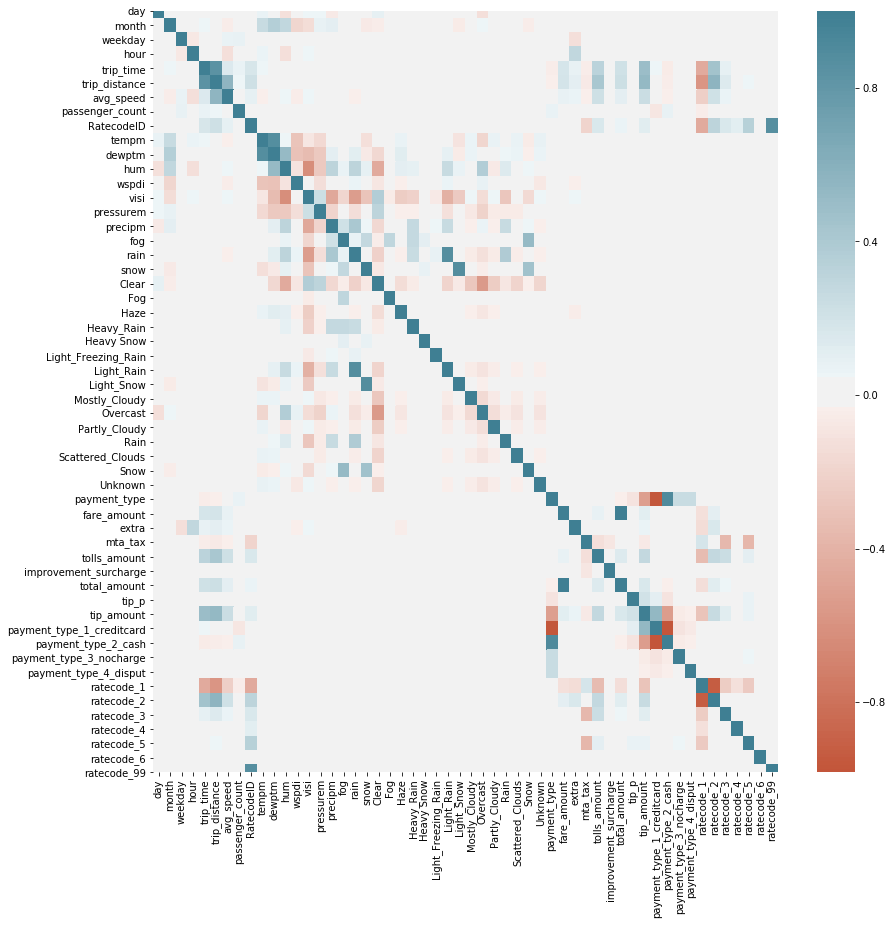

In [9]:
plt.figure(figsize = (14,14))
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))

## Let's use this correlation heatmap as a guide to explore some the data more closely.

## Distributions of Trip Times

Text(0, 0.5, 'Frequency')

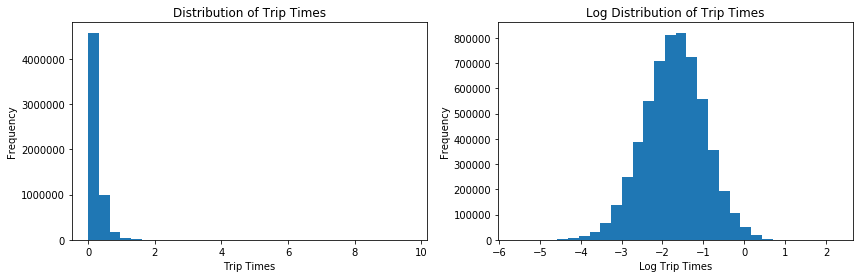

In [10]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
plt.hist(df.trip_time, bins = 30)
plt.title('Distribution of Trip Times')
plt.xlabel('Trip Times')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(np.log(df.trip_time), bins = 30)
plt.title('Log Distribution of Trip Times')
plt.xlabel('Log Trip Times')
plt.ylabel('Frequency')

## Distributions of Trip Distances

Text(0, 0.5, 'Frequency')

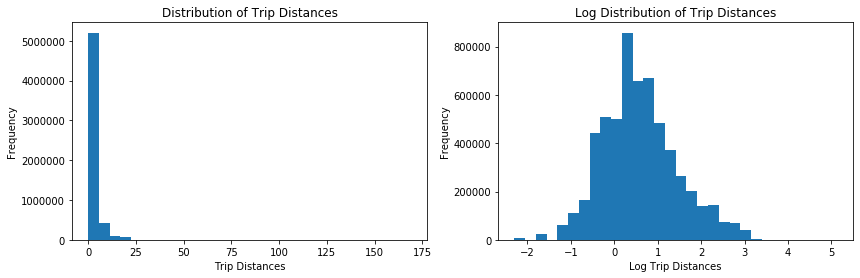

In [11]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
plt.hist(df.trip_distance, bins = 30)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distances')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(np.log(df.trip_distance), bins = 30)
plt.title('Log Distribution of Trip Distances')
plt.xlabel('Log Trip Distances')
plt.ylabel('Frequency')

The distributions for both the trip times and distances are very right skewed, which is to be expected.  The majority of the taxi rides in NYC would be short trips within the city.  The distributions of the log of the times and distances appear to be somewhat normal.

## Distributions of Tip Amounts

Text(0, 0.5, 'Counts')

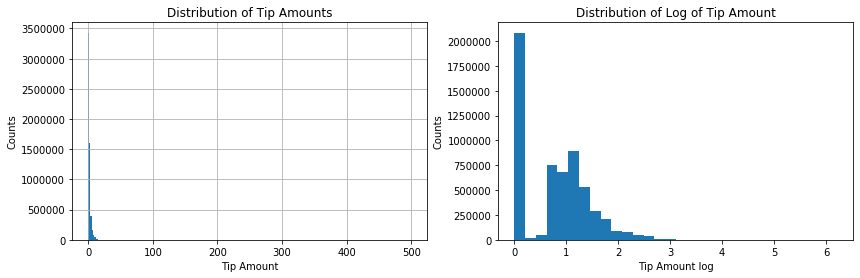

In [12]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df['tip_amount'].hist(bins = 300)
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Counts')

plt.subplot(1,2,2)
plt.hist(np.log(df.tip_amount+1), bins = 30)
plt.title('Distribution of Log of Tip Amount')
plt.xlabel('Tip Amount log')
plt.ylabel('Counts')


The tip amounts are extremely right skewed.  Taking the log gives us a nice representation of the tip amounts.  We can see that the distribution is bimodal, with a lot of tip amounts around 0, and the rest with a still slightly right skew.

Text(0, 0.5, 'Counts')

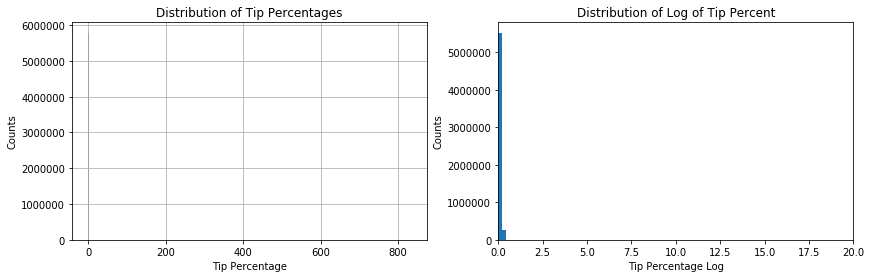

In [13]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df['tip_p'].hist(bins = 300)
plt.title('Distribution of Tip Percentages')
plt.xlabel('Tip Percentage')
plt.ylabel('Counts')

plt.subplot(1,2,2)
plt.hist(np.log(df.tip_p+1), bins = 30)
plt.xlim(0,20)
plt.title('Distribution of Log of Tip Percent')
plt.xlabel('Tip Percentage Log')
plt.ylabel('Counts')

## Let's take a closer look at the relationship between the tip amount / percentage and various other features.

Text(0.5, 1.0, 'Tip Percentage vs Tip Amount')

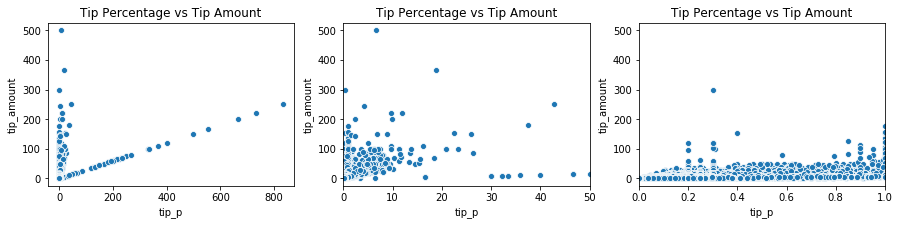

In [14]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)
sns.scatterplot('tip_p', 'tip_amount', data = df)
plt.title('Tip Percentage vs Tip Amount')

plt.subplot(1,3,2)
sns.scatterplot('tip_p', 'tip_amount', data = df)
plt.title('Tip Percentage vs Tip Amount')
plt.xlim(0,50)

plt.subplot(1,3,3)
sns.scatterplot('tip_p', 'tip_amount', data = df)
plt.xlim(0,1)
plt.title('Tip Percentage vs Tip Amount')

Unsure if there are any patterns to see here.  The tip percentages in particular do not make much sense (tips of 60000% for example).  When we zoom in to look at tip percentage between 0 and 1, it starts to look more like what we would expect with most of the tip amounts under 100.

## Trip Distances vs Tip Amount

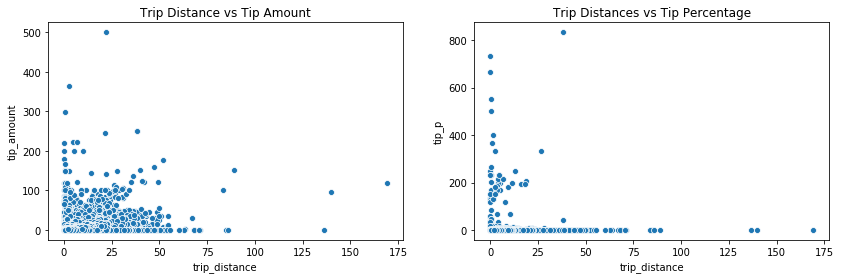

In [15]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.scatterplot('trip_distance', 'tip_amount', data = df)
plt.title('Trip Distance vs Tip Amount')

plt.subplot(1,2,2)
sns.scatterplot('trip_distance', 'tip_p', data = df)
plt.title('Trip Distances vs Tip Percentage')
plt.show()

## Trip Time vs Tip Amount

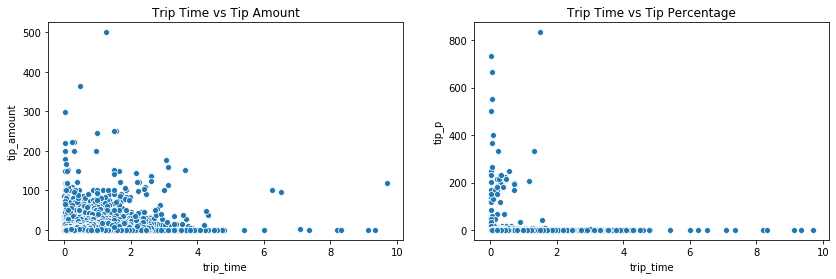

In [16]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.scatterplot('trip_time', 'tip_amount', data = df)
plt.title('Trip Time vs Tip Amount')

plt.subplot(1,2,2)
sns.scatterplot('trip_time', 'tip_p', data = df)
plt.title('Trip Time vs Tip Percentage')
plt.show()

Most of the points seem to be concentrated at the bottom left corner, indicating low trip times and low tip amounts, which makes sense since the majority of the taxi rides will be shorts rides with a low fare total, leading to generally loser tips.  Most of the higher tip amounts, however, do seem to happen for lower trip times and distances (Less and less points the more we look towards the upper right)

## Average Speed vs Tip Amount

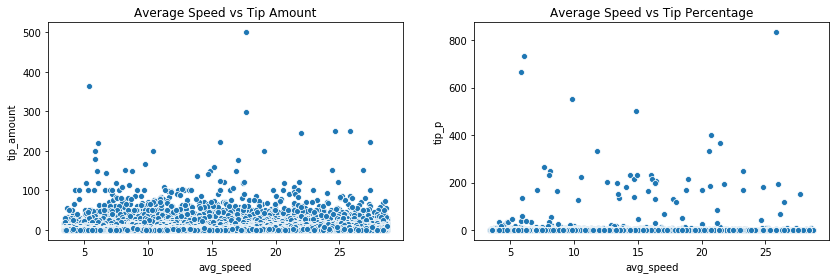

In [17]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.scatterplot('avg_speed', 'tip_amount', data = df)
plt.title('Average Speed vs Tip Amount')

plt.subplot(1,2,2)
sns.scatterplot('avg_speed', 'tip_p', data = df)
plt.title('Average Speed vs Tip Percentage')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

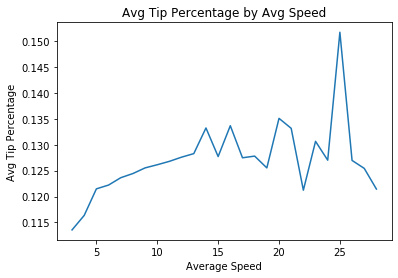

In [18]:
bins = pd.cut(df.avg_speed, list(np.linspace(0,30,31)))
df_avgspeed = df.groupby(bins)['tip_p'].agg(['mean'])
x = list(np.linspace(0,29,30))
plt.plot(x, df_avgspeed)
plt.title('Avg Tip Percentage by Avg Speed')
plt.xlabel('Average Speed')
plt.ylabel('Avg Tip Percentage')
plt.show

From the first two plots there doesn't seem to be a clear pattern.  From the aggregated plots it would appear that a higher average speed corresponds to a higher average tip percentage, but the huge spike at an average speed of around 25 makes this pattern unreliable.

## Temperature vs Tip Amount

Text(0.5, 1.0, 'Temperature vs Tip Percentage')

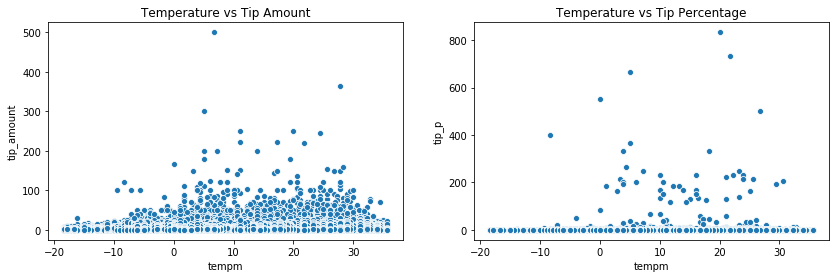

In [19]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.scatterplot('tempm', 'tip_amount', data = df)
plt.title('Temperature vs Tip Amount')

plt.subplot(1, 2, 2)
sns.scatterplot('tempm', 'tip_p', data = df)
plt.title('Temperature vs Tip Percentage')


Instances of higher tip amounts seem to occur during the warmer days.

## Precipitation vs Tip Amount

Text(0.5, 1.0, 'Precipitation vs Tip Percentage')

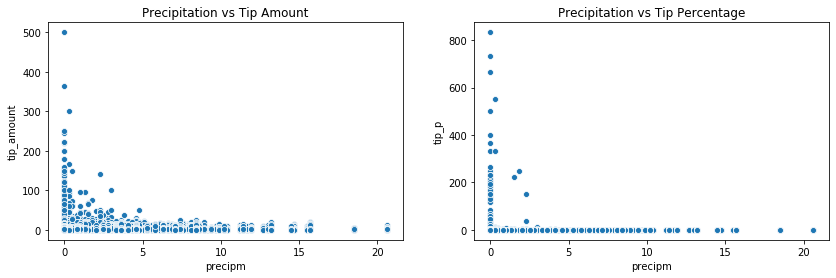

In [20]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.scatterplot('precipm', 'tip_amount', data = df)
plt.title('Precipitation vs Tip Amount')

plt.subplot(1, 2, 2)
sns.scatterplot('precipm', 'tip_p', data = df)
plt.title('Precipitation vs Tip Percentage')


It would appear that most of the instances of higher tip amounts happen when precipitation is low.

## Wind Speed vs Tip Amount

Text(0.5, 1.0, 'Wind Speed vs Tip Percentage')

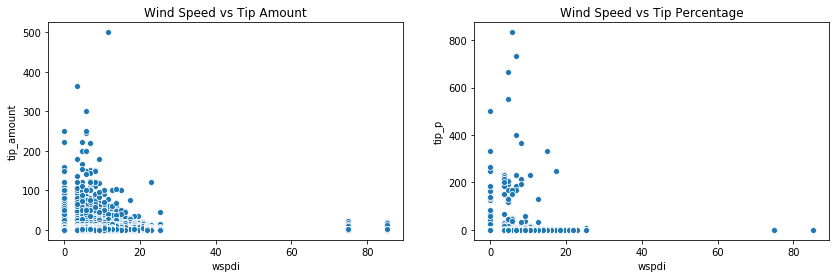

In [21]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.scatterplot('wspdi', 'tip_amount', data = df)
plt.title('Wind Speed vs Tip Amount')

plt.subplot(1, 2, 2)
sns.scatterplot('wspdi', 'tip_p', data = df)
plt.title('Wind Speed vs Tip Percentage')


Text(0, 0.5, 'Average Speed')

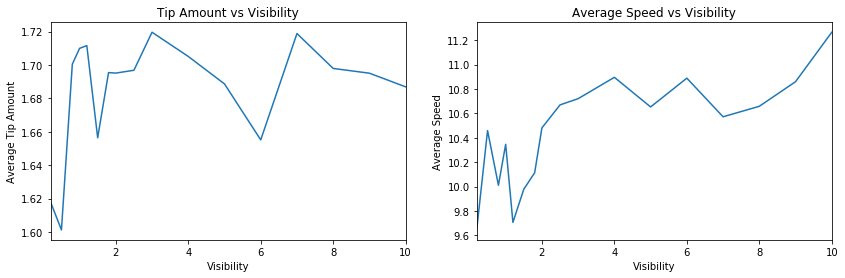

In [22]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.visi)['tip_amount'].mean().plot()
plt.title('Tip Amount vs Visibility')
plt.xlabel('Visibility')
plt.ylabel('Average Tip Amount')

plt.subplot(1,2,2)
df.groupby(df.visi)['avg_speed'].mean().plot()
plt.title('Average Speed vs Visibility')
plt.xlabel('Visibility')
plt.ylabel('Average Speed')

The average speed for times of lower visibility tend to be lower, but it is unclear if there is a relationship between the average tip amount and the visibility.

## Tip Amount Distributions for Rain, Snow, and Clear weather

In [23]:
rain = df[df.rain == 1]
snow = df[df.snow == 1]
clear = df[(df.rain == 0) & (df.snow == 0)]

clear:  1.6910700333607267
rain:  1.6845224276242978
snow:  1.605545469921618


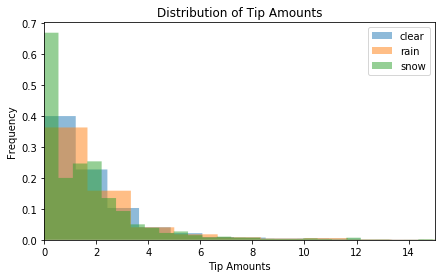

In [24]:
plt.figure(figsize = (7,4))
plt.hist(clear.tip_amount, bins = 300, density = True, alpha = 0.5, histtype = 'stepfilled')
plt.hist(rain.tip_amount, bins = 300, density = True, alpha = 0.5, histtype = 'stepfilled')
plt.hist(snow.tip_amount, bins = 300, density = True, alpha = 0.5, histtype = 'stepfilled')
plt.xlim(0,15)
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amounts')
plt.ylabel('Frequency')
plt.legend(['clear', 'rain', 'snow'])

print('clear: ', np.mean(clear.tip_amount))
print('rain: ', np.mean(rain.tip_amount))
print('snow: ', np.mean(snow.tip_amount))


There doesn't seem to be an obvious pattern here, but the mean tip amount for taxi rides during snow weather is lower than when it is raining and when it is clear.

## Average Tips for Various Pickup Datetimes

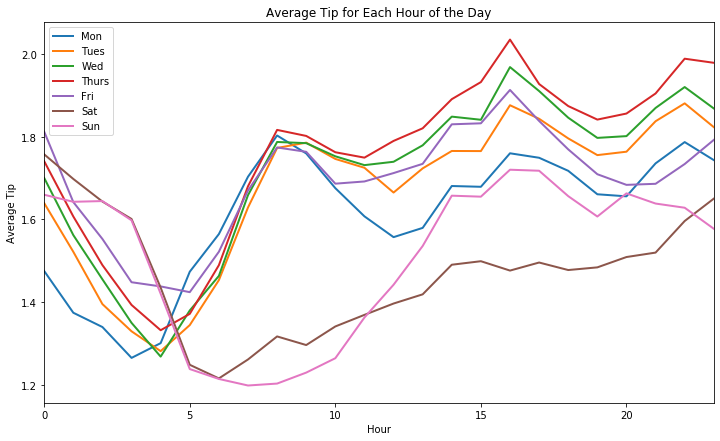

In [25]:
plt.figure(figsize = (12,7))    
for i in range(0,7):
    df.groupby(df.weekday).get_group(i).groupby(df.hour)['tip_amount'].mean().plot(linewidth = 2)
plt.title('Average Tip for Each Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Tip')
plt.legend(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize = 'medium')
plt.show()

From this plot we can see that the average tip amount drops way down at around 4am, and picks up again at around 8am, peaking at around 4pm.  This seems to make sense, since you would expect more people to be in a hurry using taxi cabs during the work day.  We can also see that the average tip amount is generally lower on saturday and sunday for most of the day.  This trend is most clearly observed at around 8am.

## Nunber of Taxi Rides for each Hour of the Day

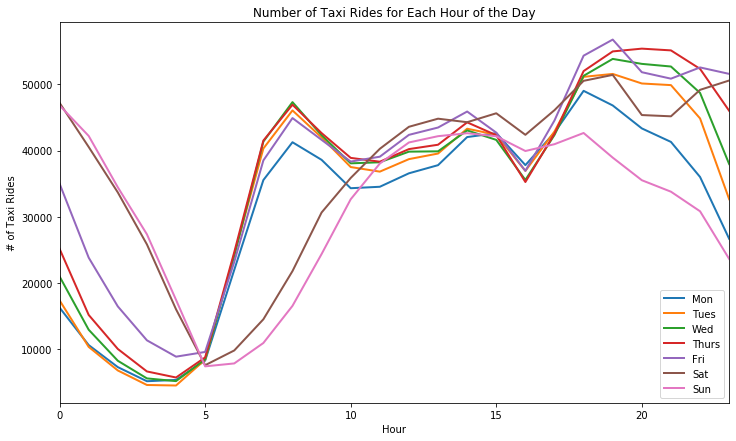

In [26]:
plt.figure(figsize = (12,7))
for i in range(0,7):
    df.groupby(df.weekday).get_group(i).groupby(df.hour).hour.count().plot(linewidth = 2)
plt.title('Number of Taxi Rides for Each Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('# of Taxi Rides')
plt.legend(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize = 'medium')
plt.show()

The number of taxi rides seems to mirror the typical work day.  Higher at around 8am, peaking around dinner time, with a sharp drop in volume late into the night at around 2 or 3am.

## Average Tips by Day of the Month

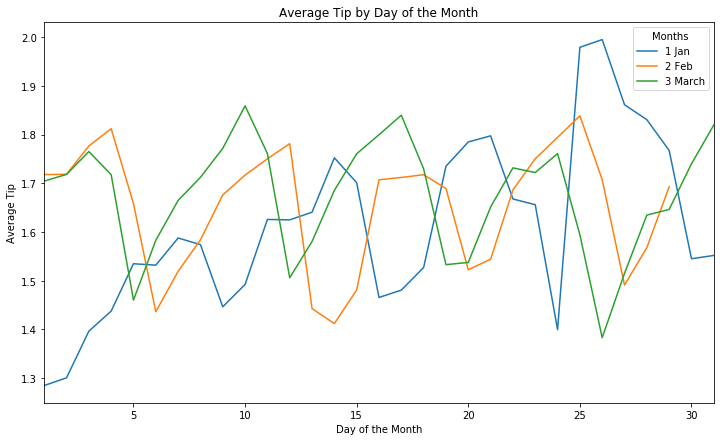

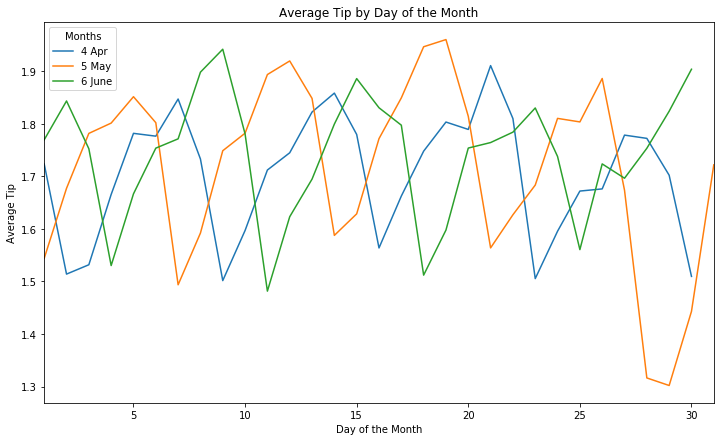

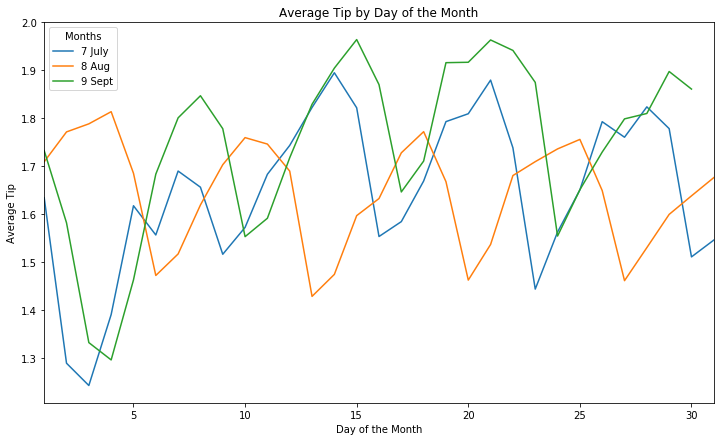

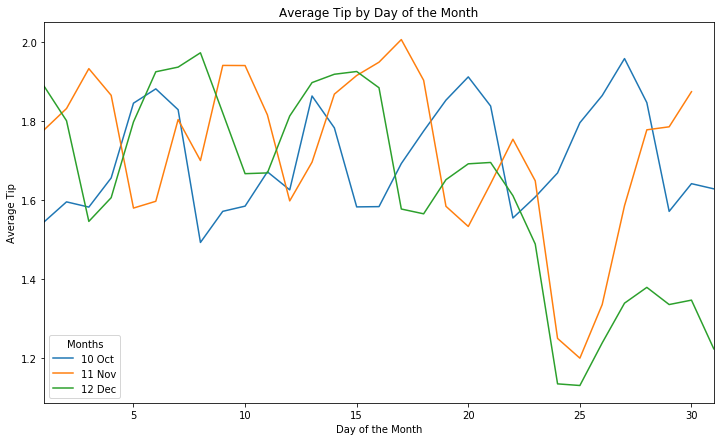

In [27]:
plt.figure(figsize = (12,7))
for i in range(1,4):
    df.groupby(df.month).get_group(i).groupby(df.day)['tip_amount'].mean().plot()
plt.legend(['1 Jan', '2 Feb', '3 March'], title = 'Months')
plt.xlabel('Day of the Month')
plt.ylabel('Average Tip')
plt.title('Average Tip by Day of the Month')
plt.show()

plt.figure(figsize = (12,7))
for i in range(4,7):
    df.groupby(df.month).get_group(i).groupby(df.day)['tip_amount'].mean().plot()
plt.legend(['4 Apr', '5 May', '6 June'], title = 'Months')
plt.xlabel('Day of the Month')
plt.ylabel('Average Tip')
plt.title('Average Tip by Day of the Month')
plt.show()

plt.figure(figsize = (12,7))
for i in range(7,10):
    df.groupby(df.month).get_group(i).groupby(df.day)['tip_amount'].mean().plot()
plt.legend(['7 July', '8 Aug', '9 Sept'], title = 'Months')
plt.xlabel('Day of the Month')
plt.ylabel('Average Tip')
plt.title('Average Tip by Day of the Month')
plt.show()

plt.figure(figsize = (12,7))
for i in range(10,13):
    df.groupby(df.month).get_group(i).groupby(df.day)['tip_amount'].mean().plot()
plt.legend(['10 Oct', '11 Nov', '12 Dec'], title = 'Months')
plt.xlabel('Day of the Month')
plt.ylabel('Average Tip')
plt.title('Average Tip by Day of the Month')
plt.show()

Aside from the normal dips in average tip amount (which from the previous plot we know happen on the weekends), we can see several larger drops in tip averages.  These happen at the start of Jan, end of May, start of July, start of September, and around the 25th of both November and December.

It does not seem like a coincidence that these are also the major holidays in the US:
New Years in Jan, Memorial Day in May, Independence Day in July, Labour Day in September, Thanksgiving in November, and Christmas in December.

We can see a clear pattern of the average tip being lower during the holidays.

## Average Tip Amount by Passenger Count

0         43
1    4688251
2     785958
3     200417
4     111098
5       3120
6       1207
7          4
9          2
Name: passenger_count, dtype: int64


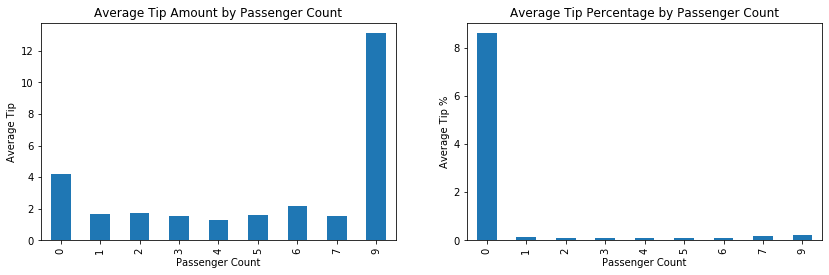

In [28]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.passenger_count)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip')

plt.subplot(1,2,2)
df.groupby(df.passenger_count)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')

print(df.passenger_count.value_counts().sort_index())

Something strange seems to be going on with the tip percentage of rides with a passenger count of 0.  Also rides with a passenger count of 7 and 9 only occur 4 and 2 times respectively, so maybe excluding them will provide a clearer picture.

Text(0, 0.5, 'Average Tip %')

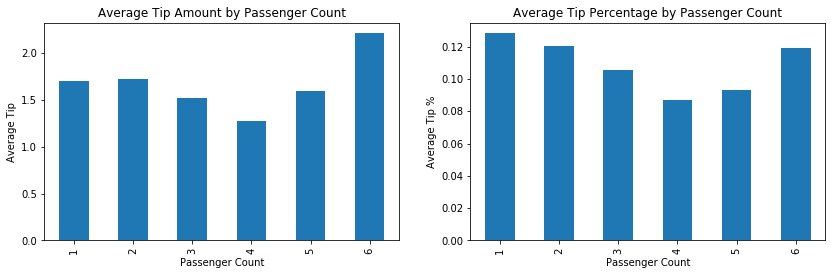

In [29]:
df_ = df[(df.passenger_count != 0) & (df.passenger_count != 7) & (df.passenger_count != 9)]

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df_.groupby(df_.passenger_count)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip')

plt.subplot(1,2,2)
df_.groupby(df_.passenger_count)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')

These plots seem to make a little more sense, with big groups providing on average a bigger tip amount, and single passengers offering a higher average tip percentage.

## Average Tip Amount by Rate Code

Text(0, 0.5, 'Average Tip %')

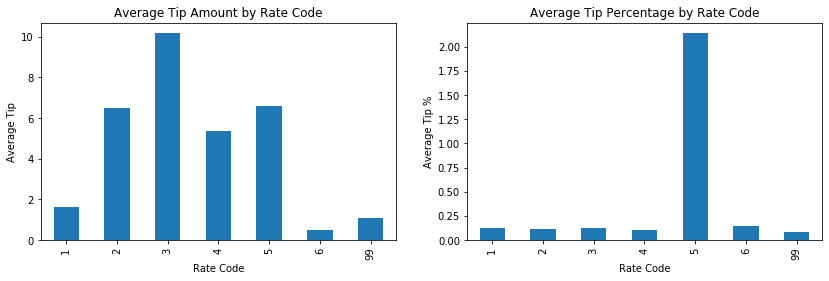

In [30]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.RatecodeID)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount by Rate Code')
plt.xlabel('Rate Code')
plt.ylabel('Average Tip')

plt.subplot(1,2,2)
df.groupby(df.RatecodeID)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip Percentage by Rate Code')
plt.xlabel('Rate Code')
plt.ylabel('Average Tip %')


## Average Trip Times by Rate Code

Text(0, 0.5, 'Average Trip Distances')

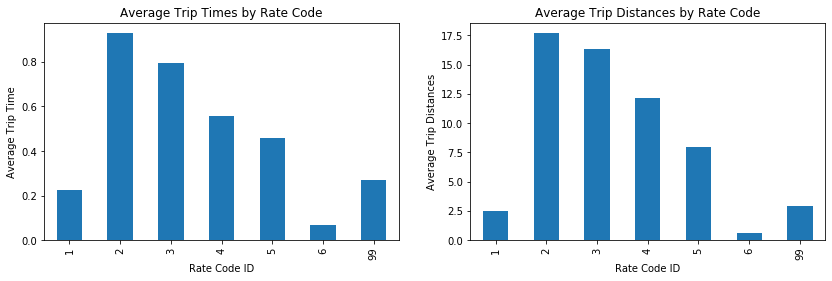

In [31]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.RatecodeID)['trip_time'].mean().plot(kind = 'bar')
plt.title('Average Trip Times by Rate Code')
plt.xlabel('Rate Code ID')
plt.ylabel('Average Trip Time')

plt.subplot(1,2,2)
df.groupby(df.RatecodeID)['trip_distance'].mean().plot(kind = 'bar')
plt.title('Average Trip Distances by Rate Code')
plt.xlabel('Rate Code ID')
plt.ylabel('Average Trip Distances')

The rate codes may provide some more insight into the tipping practices of taxi cab riders.

1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride

From these plots we can see that rides with codes 1 and 6 generally end up with a lower tip amount, however it seems to be mostly related to trips with code 1 and 6 having generally lower trip times and distances.

Rate Code 5, negotiated fares, seem to have unspectacular average tip amounts, however the tip percentage is much higher.  This somewhat makes sense, since if a passenger has negotiated a lower fare they might still tip the same they would normally, which would increase the tip percentage.

## Average Tip Amount for different Weather Conditions

Text(0.5, 1.0, 'Average Tip % for Weather Conditions')

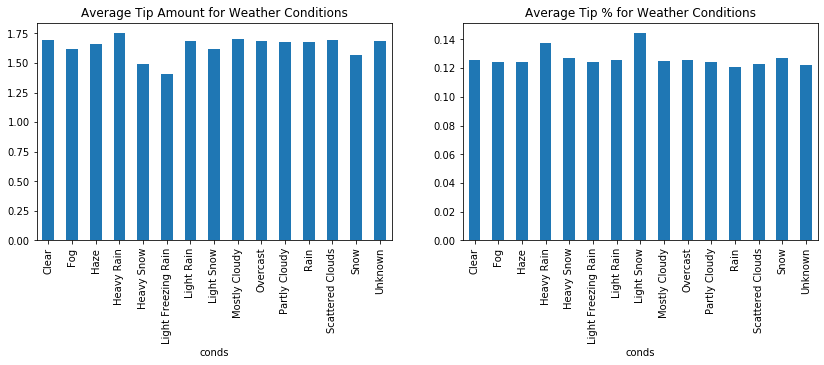

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.conds)['tip_amount'].mean().plot(kind = 'bar')
plt.title('Average Tip Amount for Weather Conditions')

plt.subplot(1,2,2)
df.groupby(df.conds)['tip_p'].mean().plot(kind = 'bar')
plt.title('Average Tip % for Weather Conditions')

Text(0.5, 1.0, 'Average Trip Time for Weather Conditions')

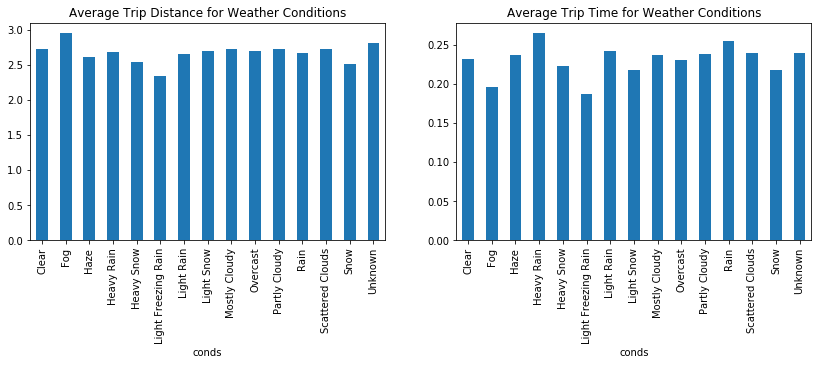

In [33]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df.groupby(df.conds)['trip_distance'].mean().plot(kind = 'bar')
plt.title('Average Trip Distance for Weather Conditions')

plt.subplot(1,2,2)
df.groupby(df.conds)['trip_time'].mean().plot(kind = 'bar')
plt.title('Average Trip Time for Weather Conditions')

From these plots, the most striking observation is that tip amounts tend to be lower during times of heavy snow and freezing rain.  This could be explained by the average trip time and distances being lower during times of freezing rain.  It does not seem to be the case for heavy snow however.

## Tip Amounts by Payment Type
#### 1= Credit card, 2= Cash, 3= No charge, 4= Dispute

In [34]:
df.payment_type.value_counts()

1    3824809
2    1917572
3      34608
4      13111
Name: payment_type, dtype: int64

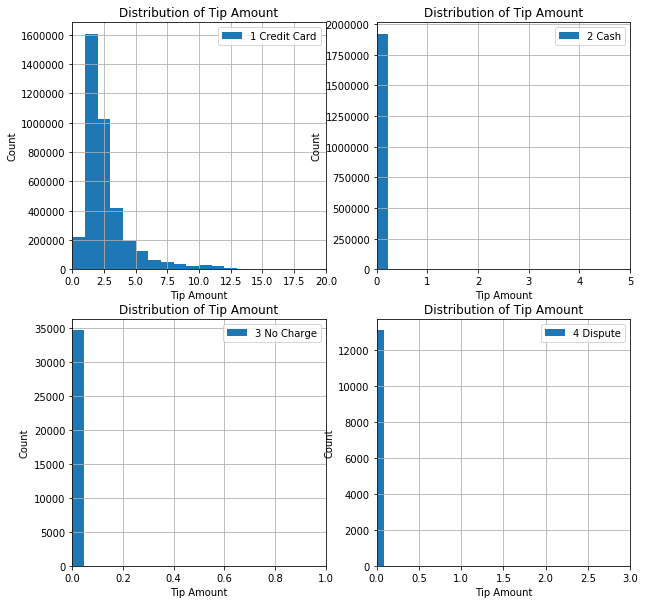

In [35]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
df[df.payment_type == 1].tip_amount.hist(bins = 500)
plt.xlim(0,20)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.legend(['1 Credit Card'])
plt.subplot(2,2,2)
df[df.payment_type == 2].tip_amount.hist(bins = 100)
plt.xlim(0,5)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.legend(['2 Cash'])
plt.subplot(2,2,3)
df[df.payment_type == 3].tip_amount.hist(bins = 100)
plt.xlim(0,1)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.legend(['3 No Charge'])
plt.subplot(2,2,4)
df[df.payment_type == 4].tip_amount.hist(bins = 100)
plt.xlim(0,3)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.legend(['4 Dispute'])


Several interesting things can be seen here.  Most tips fall between 0 and 5 dollars and the average tip amount when it's snowing is lower (although this may change once we explore some more and get a better handle on the outliers).  It also seems to be the case that tips are lower when there is light freezing rain.  The rate code appears to be related to the tips a taxi cab will receive.  Rate codes 1 and 6 (standard and group fares) have the lowest average tip amounts.  Rate code 3 (Newark) has the highest average.

The average tip amounts also seem to be generally higher during the typical weekday workday (Monday to Friday 9 to 5) than any other time.  Saturday and Sunday morning seem to be the lowest times.  From the plot showing the average tips per day for each month, something strange happens at around the 25th for November and December.  This time of the year is Thanksgiving and Christmas and most people are on holidays then.  It does seem counterintuitive that people would become less generous during the holidays.  Taking this information along with the fact that tips are higher during the work day, one possible theory is that tips may be higher when passengers feel like they're in more of a hurry.

# Statistical Analysis

In [40]:
import scipy.stats as stats
import statsmodels.api as sm
import researchpy as rp

## Test the tip amounts relationship to RatecodeID
### 1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride

In [41]:
df_ratecode = pd.DataFrame(df.groupby(df.RatecodeID).tip_amount.mean())
df_ratecode

,tip_amount
RatecodeID,
1,1.605714
2,6.514244
3,10.184862
4,5.351141
5,6.606078
6,0.486667
99,1.081719


In [42]:
rp.summary_cont(df.groupby(df.RatecodeID).tip_amount)

,N,Mean,SD,SE,95% Conf.,Interval
RatecodeID,,,,,,
1,5694395,1.605714,1.976771,0.000828,1.604090,1.607337
2,82539,6.514244,6.024691,0.020970,6.473142,6.555346
3,5728,10.184862,8.733535,0.115395,9.958667,10.411057
4,1227,5.351141,8.963696,0.255897,4.849379,5.852903
5,6132,6.606078,13.261361,0.169351,6.274123,6.938032
6,15,0.486667,1.542084,0.398164,-0.321126,1.294460
99,64,1.081719,2.208552,0.276069,0.536346,1.627092


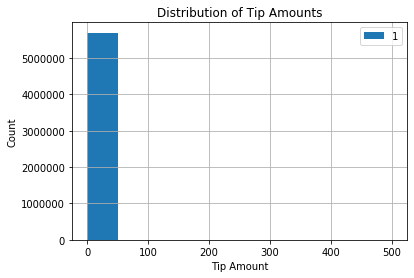

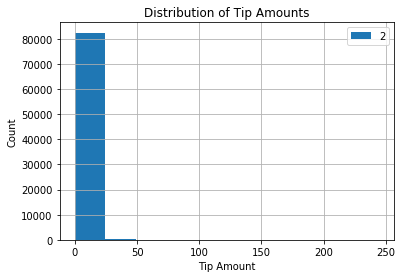

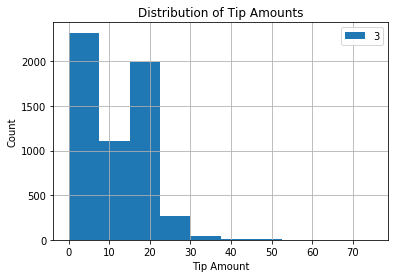

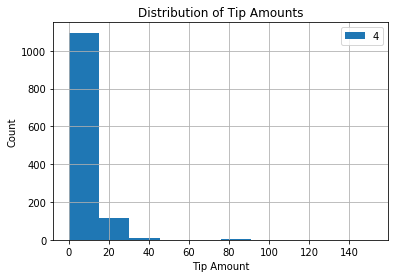

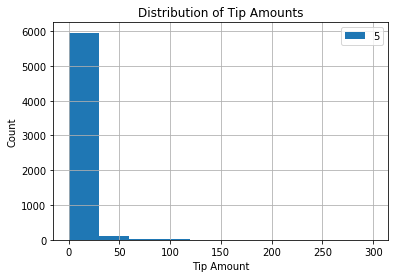

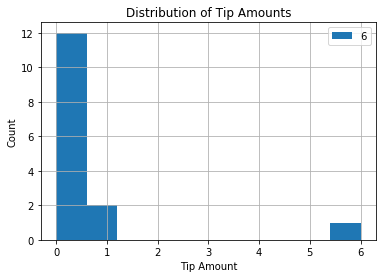

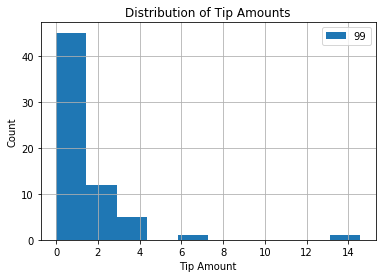

In [43]:
for i in [1, 2, 3, 4, 5, 6, 99]:
    df[df.RatecodeID == i].tip_amount.hist()
    plt.title('Distribution of Tip Amounts')
    plt.xlabel('Tip Amount')
    plt.ylabel('Count')
    plt.legend([i])
    plt.show()

### Since the distributions don't appear to be normal, we should use the kruskal test 

In [44]:
df_sample1 = df[df.RatecodeID == 1].tip_amount
df_sample2 = df[df.RatecodeID == 2].tip_amount
df_sample3 = df[df.RatecodeID == 3].tip_amount
df_sample4 = df[df.RatecodeID == 4].tip_amount
df_sample5 = df[df.RatecodeID == 5].tip_amount
df_sample6 = df[df.RatecodeID == 6].tip_amount
df_sample99 = df[df.RatecodeID == 99].tip_amount

In [45]:
stats.kruskal(df_sample1, df_sample2, df_sample3, df_sample4, df_sample5, df_sample6, df_sample99)

KruskalResult(statistic=32917.61972061856, pvalue=0.0)

In [46]:
data = [df_sample1, df_sample2, df_sample3, df_sample4, df_sample5, df_sample6, df_sample99]
kruskal_list = []
for i in data:
    temp = []
    for k in data:
        temp.append(round(stats.kruskal(i,k)[1], 3))
    kruskal_list.append(temp)
    
kruskal_ratecode = pd.DataFrame(kruskal_list, columns = [1, 2, 3, 4, 5, 6, 99])
kruskal_ratecode

,1,2,3,4,5,6,99
0,1.000,0.0,0.0,0.000,0.000,0.001,0.000
1,0.000,1.0,0.0,0.000,0.000,0.000,0.000
2,0.000,0.0,1.0,0.000,0.000,0.000,0.000
3,0.000,0.0,0.0,1.000,0.936,0.005,0.000
4,0.000,0.0,0.0,0.936,1.000,0.011,0.000
5,0.001,0.0,0.0,0.005,0.011,1.000,0.128
6,0.000,0.0,0.0,0.000,0.000,0.128,1.000


Let's use an alpha of 0.05.  From this grid we can see that the distributions of rate codes 3 and 4 have a p > .05, as does the distributions for rate codes 5 and 6.  This suggests that the tip amounts for 3 and 4 are similar, as well as the tip amounts for 6 and 99.

### Tips by Payment Type

In [47]:
df_sample1 = df[df.payment_type_1_creditcard == 1].tip_amount
df_sample2 = df[df.payment_type_2_cash == 1].tip_amount
df_sample3 = df[df.payment_type_3_nocharge == 1].tip_amount
df_sample4 = df[df.payment_type_4_disput == 1].tip_amount

In [48]:
stats.kruskal(df_sample1, df_sample2, df_sample3, df_sample4)

KruskalResult(statistic=3864031.037511366, pvalue=0.0)

In [49]:
data = [df_sample1, df_sample2, df_sample3, df_sample4]
kruskal_list = []
for i in data:
    temp = []
    for k in data:
        temp.append(round(stats.kruskal(i,k)[1], 3))
    kruskal_list.append(temp)
    
kruskal_payment_type = pd.DataFrame(kruskal_list, columns = [1, 2, 3, 4])
kruskal_payment_type

,1,2,3,4
0,1.0,0.0,0.00,0.00
1,0.0,1.0,0.00,0.00
2,0.0,0.0,1.00,0.47
3,0.0,0.0,0.47,1.00


As before, we use an alpha of 0.05 and a null hypothesis that says the distributions are equal.  We can see that payment type 3 and 4 have p > 0.05 so for that pair we can reject the null hypothesis and say that the distribution of tip amounts for payment types 3 and 4 are similar.

## Tips by General Weather

In [50]:
df_sample1 = df[df.rain == 1].tip_amount
df_sample2 = df[df.snow == 1].tip_amount
df_sample3 = df[(df.rain == 0) & (df.snow == 0)].tip_amount

In [51]:
stats.kruskal(df_sample1, df_sample2, df_sample3)

KruskalResult(statistic=162.7868336583188, pvalue=4.480105156687155e-36)

In [52]:
data = [df_sample1, df_sample2, df_sample3]
kruskal_list = []
for i in data:
    temp = []
    for k in data:
        temp.append(round(stats.kruskal(i,k)[1], 3))
    kruskal_list.append(temp)
    
kruskal_payment_type = pd.DataFrame(kruskal_list, columns = ['rain', 'snow', 'clear'])
kruskal_payment_type

,rain,snow,clear
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


The distribution of the tip amounts across different weather conditions all have a p < 0.05, meaning we can reject the null hypothesis that the distributions are the same and say that they are different.

## Chi-squared test
With these categorical variables, we would like to examine the relationships between the categories so that we can limit multicollinearity when it comes to our model.

Using an alpha of 0.05, we can say our null hypothesis is that there is no statistically significant relationship between the two categorical variables.

### Rate Code and Payment Type

In [54]:
contingency_table = pd.crosstab(df['RatecodeID'],df['payment_type'],margins = True)
contingency_table

payment_type,1,2,3,4,All
RatecodeID,,,,,
1,3763868,1885661,32329,12537,5694395
2,52492,28503,1213,331,82539
3,4106,1381,187,54,5728
4,683,491,42,11,1227
5,3631,1490,834,177,6132
6,3,10,2,0,15
99,26,36,1,1,64
All,3824809,1917572,34608,13111,5790100


In [55]:
f_obs = []
f_obs = np.array([contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values, 
                  contingency_table.iloc[2][0:4].values, contingency_table.iloc[3][0:4].values, 
                  contingency_table.iloc[4][0:4].values, contingency_table.iloc[5][0:4].values, 
                  contingency_table.iloc[6][0:4].values])

In [56]:
from scipy import stats

stats.chi2_contingency(f_obs)[0:3]

(22111.599084680613, 0.0, 18)

From the test we get a p value of 0 (less than our alpha of 0.05).  Thus we reject our null hypothesis and can conclude that there is some sort of relationship between the rate code and the payment type.

### Rate Code and Weather


In [57]:
#create a temporary list representing the weather conditions
#1 for rain, 2 for snow, 0 for neither (clear conditions)

weather_list = df.rain + 2*df.snow

In [58]:
contingency_table = pd.crosstab(weather_list, df.RatecodeID,margins = True)
contingency_table

RatecodeID,1,2,3,4,5,6,99,All
row_0,,,,,,,,
0,5405235,78136,5403,1169,5822,15,58,5495838
1,254223,3946,295,53,265,0,6,258788
2,34937,457,30,5,45,0,0,35474
All,5694395,82539,5728,1227,6132,15,64,5790100


In [59]:
f_obs = []
f_obs = np.array([contingency_table.iloc[0][0:7].values, contingency_table.iloc[1][0:7].values, 
                  contingency_table.iloc[2][0:7].values])

In [60]:
stats.chi2_contingency(f_obs)[0:3]

(37.88496234009569, 0.00016035326566163482, 12)

Again, with a p value of less than 0.05, we can reject the null hypothesis and conclude that there is some sort of relationship between the weather and the rate code ID.

In [61]:
### Payment Type and Weather

In [62]:
contingency_table = pd.crosstab(weather_list, df.payment_type,margins = True)
contingency_table

payment_type,1,2,3,4,All
row_0,,,,,
0,3631951,1818691,32778,12418,5495838
1,169565,87007,1618,598,258788
2,23293,11874,212,95,35474
All,3824809,1917572,34608,13111,5790100


In [63]:
f_obs = []
f_obs = np.array([contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values, 
                  contingency_table.iloc[2][0:4].values])

In [64]:
stats.chi2_contingency(f_obs)[0:3]

(41.32952088415631, 2.4935073902911075e-07, 6)

Lastly, with a p value of less than 0.05, we can again reject the null hypothesis and conclude that there is some sort of relationship between the weather and the payment type.

It appears that these categorical variables have some sort of relationship with each other (what it is we are unsure).  This suggests that we should avoid using them at the same time in our regression modeling process so that we can avoid multicollinearity.